<a href="https://colab.research.google.com/github/tranvohuy/Markovify_sentence_Truyen_Kieu/blob/master/Truyen_Kieu_Markovify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we learn how to make poems. The poem style we choose is from Truyện Kiều. The strategy is from [Markovify](https://github.com/jsvine/markovify) module. The main point is to understand a data science problem (pipeline?) from data processing, to modelling, testing, and implementation. The other point is to understand Markovify module. What is the main idea? How is it related to mathematics? etc


# Truyện Kiều

[Truyện Kiều](https://en.wikipedia.org/wiki/The_Tale_of_Kieu) is a famous epic poem written by Nguyen Du. This poem is learnt by every student in Vietnam.
 
 The poem has the 6-8 style. That means a 6-word sentence is followed by a 8-word sentence. These two sentences are correlated by rhymes.
 
 We will use [Markovify](https://github.com/jsvine/markovify). This module will import a whole text as one string (of many sentences). Then it will make individual sentence. The next sentence is totally independent of the current sentence.
 
 Therefore, we will pre-process Truyen Kieu by combining consecutive 6-word and 8-word sentences into one sentence.

References:
- [Word2vec on Nguyen Du](https://blog.duyet.net/2017/04/nlp-truyen-kieu-word2vec.html#.XJOZAChKiqY)
- [Other blog](https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/Word2Vec.ipynb)
- https://www.kaggle.com/paultimothymooney/poetry-generator-rnn-markov/notebook
- [Markovify](https://github.com/jsvine/markovify)
- [Thơ máy](http://www.thomay.vn/thomay/)

- [Poetry RNN](https://www.kaggle.com/paultimothymooney/poetry-generator-rnn-markov/notebook)

# Data preprocessing

If you already have a 'clean' data like this [one](https://github.com/tranvohuy/sentiment_sentence/blob/master/data/Truyen_Kieu.txt), you can skip this part.

- First, we copy the content [here](https://sites.google.com/site/khonggianketnoidqt/truyen-kieu-tron-bo), and save it in a text file 'Truyen_Kieu_internet.txt'
  - You can either copy from the web or use BeautifulSoup.
  
  - The text there is not well-punctuated.
  - A mistake at line 120, and another above line 130
  - To have a 'cleaner' version, we have to check carefully the poem, or find a better source. But we can ignore it, simplify troubles as much as possible, just to get a basic model. Then we can construct a more complicated model (including cleaner data, better model structure, etc).
- Then upload it to colab.
- Import it into a dataframe.
- Use regex to delete redundant details.
 - As mentioned above, for a basic model, it is better to delele all punctuation marks and to lower all characters
- Save the poem to a txt file.

- Some codes are learnt from [here](https://blog.duyet.net/2017/04/nlp-truyen-kieu-word2vec.html#.XJU7BShKiqY).

In [1]:
from google.colab import files
files.upload()
import pandas as pd
file_name = 'Truyen_Kieu_from_web.txt'
df = pd.read_csv(file_name, sep="/", names=["row"]).dropna()

#to see what df is about
#df.sample(4)
#df.head(10)
#etc

import re

def transform_row(row):
    # Delete numbers, dots, commas at the beginning of sentences
    row = re.sub(r"^[0-9\.,]+", "", row)
    
    # Delete dots, commas, question marks at the end
    row = re.sub(r"[\.,\?!]+$", "", row)
    
    #remove white spaces at the beginning and end of sentences
    row = row.strip()
    return row 

df["row"] = df.row.apply(transform_row)

#save df to txt file

with  open('Truyen_Kieu_simple_version.txt','w')  as f:
  for index, row in df.iterrows():
    f.write(row['row']+' ')
    if index%2 !=0:
      f.write('\n')

Saving Truyen_Kieu_from_web.txt to Truyen_Kieu_from_web.txt


## Create a no-punctuation-mark version

In this version, there is no punctuation mark. Each pair of 6-8 is combined as one line.

In [2]:
from google.colab import files
files.upload()
import pandas as pd
import re
file_name = 'Truyen_Kieu_from_web.txt'

df = pd.read_csv(file_name, sep="/", names=["row"]).dropna()
def transform_row(row):
    # Delete numbers, dots, commas at the beginning of sentences
    row = re.sub(r"^[0-9\.,]+", "", row)
    
    # Delete dots, commas, question marks, colons,
    row = re.sub(r"[\.,\?!:0-9]", "", row)
    
    #remove white spaces at the beginning and end of sentences
    row = row.strip()
    return row 

df["row"] = df.row.apply(transform_row)

#save df to txt file

with  open('Truyen_Kieu_no_punctuation_newline.txt','w')  as f:
  for index, row in df.iterrows():
    f.write(row['row'] + ' ')
    if index%2 !=0:
      f.write('\n')

Saving Truyen_Kieu_from_web.txt to Truyen_Kieu_from_web (1).txt


# Import Truyen Kieu
- Now suppose we have a clean version. 
- Import it now.

In [0]:
from google.colab import files
files.upload()
import pandas as pd

Saving Truyen_Kieu_simple_v1.txt to Truyen_Kieu_simple_v1.txt


In [0]:
!pip install markovify

    100% |████████████████████████████████| 245kB 10.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/66/fe/5b/07257dd2401d9835447a0f0223f967c998c153404d32612253
Successfully built markovify


## analyze the text

In [3]:
import re
with open("Truyen_Kieu_no_punctuation_newline.txt") as f:
    text = f.read()
words = text.split()

text_no_newline = re.sub(r' \n+', '. ', text) # many lines are combined as one line (no '\n' character)

print('The number of different/total characters in the text:{}/{}'.format(len(set(text_no_newline)), len(text_no_newline)))



print('The number of different/total words in the text:{}/{}'.format(len(set(words)), len(words)))
data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
most_words = [x[0] for x in data]
times_used = [int(x[1]) for x in data]
print('Most frequent words')
for i in range(6):
  print('{}: {} times'.format(data[i][0], data[i][1]))

The number of different/total characters in the text:125/102525
The number of different/total words in the text:3381/22807
Most frequent words
một: 241 times
đã: 231 times
người: 201 times
là: 165 times
lời: 156 times
cho: 155 times


# run Markovify

In [0]:
import markovify
with open("Truyen_Kieu_no_punctuation_newline.txt") as f:
    text = f.read()
#text is ONE string.

# Build the model.
text_model = markovify.NewlineText(text, state_size = 2)

# Print five randomly-generated sentences
for i in range(5):
    print(text_model.make_sentence())

Biết thân đến thế này
Chung quanh vẫn đất nước nhà Với Vương Quan là chữ nối dòng nho gia
Mẹo lừa đã mắc tay ai cầm
Sớm khuya khăn mắt lược đầu Phận con thôi có ra gì mai sau
Giác Duyên nghe nói thủy chung Bất bình nổi trận bời bời Ngập ngừng thẹn lục e hồng Nghĩ lòng lại gạn đến lời riêng tây Sạch sành sanh vét cho đầy đọa trẻ càng oan khốc già


## Observation:

- The length of each sentence is mostly not 6+8 = 14 word long. 
- Recall that 6-8 style is a 6-word sentence followed by an 8-word one.
- Most of the times, there is no rhyme between the 6-th word and 12-word.

# Understand the module Markovify



What happens when we run `text_model = markovify.NewlineText(text, state_size = 2)` or `text_model = markovify.Text(text, state_size = 2)`


# Class Text
- [init](https://github.com/jsvine/markovify/blob/master/markovify/text.py#L17) (self, input_text, state_size=2, chain=None, parsed_sentences=None, retain_original=True)

Basically,
- `input_text` is a string of sentences. Each sentence ends by a dot `.`, not by a new line `\n`. 
- If sentences in our `input_text` end by new line `\n`. We should use `markovify.NewlineText(input_text)` instead of `markovify.Text(input_text)`.

- In the following example, sentences end with `\n`.


In [0]:
import markovify
with open("Truyen_Kieu_clean_v1.txt") as f:
    text = f.read()

In [0]:
text[0:1000]

'Trăm năm trong cõi người ta Chữ tài chữ mệnh khéo là ghét nhau \nTrải qua một cuộc bể dâu Những điều trông thấy mà đau đớn lòng \nLạ gì bỉ sắc tư phong Trời xanh quen thói má hồng đánh ghen \nCảo thơm lần giở trước đèn Phong tình có lục còn truyền sử xanh \nRằng năm Gia Tĩnh triều Minh Bốn phương phẳng lặng, hai kinh vững vàng \nCó nhà viên ngoại họ Vương Gia tư nghĩ cũng thường thường bực trung \nMột trai con thứ rốt lòng Vương Quan là chữ, nối dòng nho gia \nĐầu lòng hai ả tố nga Thúy Kiều là chị, em là Thúy Vân \nMai cốt cách, tuyết tinh thần Một người một vẻ, mười phân vẹn mười \nVân xem trang trọng khác vời Khuôn trăng đầy đặn, nét ngài nở nang \nHoa cười ngọc thốt đoan trang Mây thua nước tóc, tuyết nhường màu da \nKiều càng sắc sảo, mặn mà So bề tài, sắc, lại là phần hơn \nLàn thu thủy, nét xuân sơn Hoa ghen thua thắm, liễu hờn kém xanh \nMột, hai nghiêng nước nghiêng thành Sắc đành đòi một, tài đành họa hai \nThông minh vốn sẵn tư trời Pha nghề thi họa, đủ mùi ca ngâm \nCung t

- `input_text` will be break into a list of sentences through [`self.generate_corpus(input_text)`](https://github.com/jsvine/markovify/blob/master/markovify/text.py#L33).
- And each sentence is splitted by words.

-So there is `text_model.parsed_senteces` which is a list. Each element of the list is a word from sentences.

In [0]:
text_model = markovify.NewlineText(text)

In [0]:
print(text_model.parsed_sentences[0:3])

[['Trăm', 'năm', 'trong', 'cõi', 'người', 'ta', 'Chữ', 'tài', 'chữ', 'mệnh', 'khéo', 'là', 'ghét', 'nhau'], ['Trải', 'qua', 'một', 'cuộc', 'bể', 'dâu', 'Những', 'điều', 'trông', 'thấy', 'mà', 'đau', 'đớn', 'lòng'], ['Lạ', 'gì', 'bỉ', 'sắc', 'tư', 'phong', 'Trời', 'xanh', 'quen', 'thói', 'má', 'hồng', 'đánh', 'ghen']]


- This list `text_model.parsed_sentences` is [put ](https://github.com/jsvine/markovify/blob/master/markovify/text.py#L37)into a Markov chain to analyze.

We now go to the [`Chain`](https://github.com/jsvine/markovify/blob/master/markovify/chain.py) class. 
- [init](https://github.com/jsvine/markovify/blob/master/markovify/chain.py#L32) (self, corpus, state_size, model=None)
- The `init` will run [`build(self, corpus, state_size)`](https://github.com/jsvine/markovify/blob/master/markovify/chain.py#L47) 
  -  Count the number of times $w_3$ appears immediately after the words $w_1w_2$.
- And run [precompute_begin_state](https://github.com/jsvine/markovify/blob/master/markovify/chain.py#L45)

So
`text_model.chain = Chain(text_model.parsed_sentences, state_size)`

We now analyze line [58](https://github.com/jsvine/markovify/blob/master/markovify/chain.py#L58) to 72.

 

```

       model = {}

        for run in corpus:
            items = ([ BEGIN ] * state_size) + run + [ END ]
            for i in range(len(run) + 1):
                state = tuple(items[i:i+state_size])
                follow = items[i+state_size]
                if state not in model:
                    model[state] = {}

                if follow not in model[state]:
                    model[state][follow] = 0

                model[state][follow] += 1
        return model

```

where corpus = $[ [w_{11}, w_{12}, w_{13}, w_{14}],   
[w_{21}, w_{22}, w_{23},w_{24},w_{25}],    \cdots]$ 

- First `run` = $[w_{11}, w_{12}, w_{13}, w_{14}]$.
- items = [ BEGIN, BEGIN, $w_{11}, w_{12}, w_{13}, w_{14}$, END]. Note that `state_size=2` by default.
- `i` in `(0,1,2,3,4)`
  - `i=0` gives `state=(BEGIN, BEGIN)`, `follow =` $w_{11}$
    - model[(BEGIN, BEGIN)][$w_{11}$] =1
  - `i=1` gives `state= (BEGIN, w_{11})`, and `follow` = $w_{12}$
    - model[(BEGIN, w_{11})][$w_{12}$] =1
  -  `i=4` gives `state` = $(w_{13},w_{14}$), `follow = END`
    
 -So model[($w_1,w_2$)][$w_3$] counts the number of times the word $w_3$ comes immediately after $w_1w_2$
 
 - `model` is a `dict` class.

In [0]:
print(type(text_model.chain.model))
print(text_model.chain.model[("___BEGIN__", "___BEGIN__")])
#there are a lot of ways to begin a sentence.

<class 'dict'>
{'Trăm': 4, 'Trải': 2, 'Lạ': 5, 'Cảo': 1, 'Rằng': 1, 'Có': 14, 'Một': 38, 'Đầu': 2, 'Mai': 4, 'Vân': 2, 'Hoa': 8, 'Kiều': 7, 'Làn': 1, 'Một,': 1, 'Thông': 1, 'Cung': 3, 'Khúc': 5, 'Phong': 8, 'Êm': 1, 'Ngày': 4, 'Cỏ': 1, 'Thanh': 1, 'Gần': 3, 'Dập': 2, 'Ngổn': 2, 'Tà': 1, 'Bước': 3, 'Nao': 1, 'Sè': 1, 'Rằng:': 28, 'Vương': 2, 'Nổi': 1, 'Kiếp': 5, 'Thuyền': 3, 'Buồng': 5, 'Khóc': 4, 'Đã': 18, 'Sắm': 3, 'Lòng': 7, 'Đau': 4, 'Phũ': 1, 'Sống': 1, 'Nào': 4, 'đã': 3, 'Gọi': 2, 'Lầm': 1, 'Rút': 1, 'Lại': 9, 'Nỗi': 13, 'Quan': 3, 'ở': 6, 'Dễ': 3, 'Thoắt': 6, 'Dấu': 1, 'Nàng': 57, 'Chớ': 1, 'Dùng': 3, 'Trông': 10, 'đề': 1, 'Tuyết': 1, 'Nẻo': 1, 'Hài': 1, 'Chàng': 9, 'Nguyên': 1, 'Nền': 1, 'Chung': 4, 'Vẫn': 1, 'Nước': 3, 'May': 1, 'Bóng': 5, 'Người': 15, 'Chập': 1, 'Dưới': 6, 'Gương': 2, 'Hải': 2, 'Chênh': 1, 'Sương': 1, 'Chào': 1, 'Thưa': 8, 'Hàn': 2, 'Mấy': 8, 'Vâng': 3, 'Âu': 1, 'Này': 6, 'Xem': 4, 'Ví': 5, 'Thềm': 1, 'Gió': 4, 'Giọng': 1, 'Cớ': 3, 'Buổi': 1, 'đoạn': 1, 'Cứ': 

In [0]:
# list all words that appear after word1 = "Trăm" and word2 = "năm" in the original text

print(text_model.chain.model[("Trăm", "năm")])
print(text_model.chain.model[("___BEGIN__", "Trăm")])
print(text_model.chain.model["Thúy", "Kiều"])
print(text_model.chain.model["Thúy", "Vân"])
#There are not many ways to continue the sentence given "Thúy Vân"

{'trong': 1, 'biết': 1, 'tạc': 1, 'thề': 1, 'để': 1, 'tính': 1, 'danh': 1}
{'năm': 2, 'nghìn': 1, 'điều': 1}
{'là': 1, 'sắc': 1, 'Mắc': 1, 'tài': 1}
{'___END__': 2, 'chợt': 1, 'thay': 1}


We now analyze [`precompute_begin_state()`](https://github.com/jsvine/markovify/blob/master/markovify/chain.py#L45)



```
        begin_state = tuple([ BEGIN ] * self.state_size)
        choices, weights = zip(*self.model[begin_state].items())
        cumdist = list(accumulate(weights))
        self.begin_cumdist = cumdist
        self.begin_choices = choices
```

- `self.begin_choices` is the list of words appearing at the beginning of sentences in `input_text`. There is also weight for each of these "beginning" words (in `cumdist`).

In [0]:
print(type(text_model.chain.begin_choices))
print(text_model.chain.begin_choices)
print(text_model.chain.begin_cumdist)

<class 'tuple'>
('Trăm', 'Trải', 'Lạ', 'Cảo', 'Rằng', 'Có', 'Một', 'Đầu', 'Mai', 'Vân', 'Hoa', 'Kiều', 'Làn', 'Một,', 'Thông', 'Cung', 'Khúc', 'Phong', 'Êm', 'Ngày', 'Cỏ', 'Thanh', 'Gần', 'Dập', 'Ngổn', 'Tà', 'Bước', 'Nao', 'Sè', 'Rằng:', 'Vương', 'Nổi', 'Kiếp', 'Thuyền', 'Buồng', 'Khóc', 'Đã', 'Sắm', 'Lòng', 'Đau', 'Phũ', 'Sống', 'Nào', 'đã', 'Gọi', 'Lầm', 'Rút', 'Lại', 'Nỗi', 'Quan', 'ở', 'Dễ', 'Thoắt', 'Dấu', 'Nàng', 'Chớ', 'Dùng', 'Trông', 'đề', 'Tuyết', 'Nẻo', 'Hài', 'Chàng', 'Nguyên', 'Nền', 'Chung', 'Vẫn', 'Nước', 'May', 'Bóng', 'Người', 'Chập', 'Dưới', 'Gương', 'Hải', 'Chênh', 'Sương', 'Chào', 'Thưa', 'Hàn', 'Mấy', 'Vâng', 'Âu', 'Này', 'Xem', 'Ví', 'Thềm', 'Gió', 'Giọng', 'Cớ', 'Buổi', 'đoạn', 'Cứ', 'Dạy', 'Ngoài', 'Hiên', 'Cho', 'Sầu', 'Mây', 'Tuần', 'Mành', 'Vì', 'Bâng', 'Nghề', 'Thâm', 'Lơ', 'Tần', 'Là', 'Lấy', 'Mừng', 'Song', 'Tấc', 'Nhẫn', 'Cách', 'Buông', 'Lần', 'Giơ', 'Ngẫm', 'Liền', 'Tan', 'Sinh', 'Thoa', 'Tiếng', 'Chiếc', 'Rày', 'Bấy', 'Vội', 'Thang', 'Sượng', 'Xương',

In [0]:
#Generate a new sentence

print(text_model.chain.walk())

['Già', 'giang', 'một', 'lão', 'một', 'trai', 'Một', 'dây', 'một', 'buộc', 'ai', 'làm', '?', 'Này', 'ai', 'đan', 'dậm,', 'giật', 'giàm', 'bỗng', 'dưng']


In [0]:
#Generate a new sentence that starting with word1 = "Trăm" and word2 = "năm"
print(text_model.chain.walk(init_state = ("Trăm", "năm")))
print(text_model.chain.walk(init_state = ("Thúy", "Kiều")))

['danh', 'tiết', 'cũng', 'vì', 'đêm', 'nay']
['Mắc', 'điều', 'tình', 'ái', 'khỏi', 'điều', 'tà', 'dâm']


# Conclusion:

- Markovify is  a very basic model. This can be transformed to a great lesson if you are teaching Probility.
  - In details, the code also handles "cleaning", for example removing ?,. , :, states names, etc.

- It is a Markov chain with `state_size = 2` that means it will produce words $w_1w_2w_3w_4\cdots$ in  a way that the conditional law of $(w_4w_5\cdots| w_1w_2w_3)$ is the same as that of $(w_4|w_2w_3)$. 

- It chooses the word $w_4$ given $w_1w_2w_3$ by learning statiscally from the original text what would appears after $w_2w_3$.

- Or in other words $(w_4w_5\cdots|w_2w_3)$ is independent of $(w_1|w_2w_3)$.

- The chain will stop when the new word is ["END"](https://github.com/jsvine/markovify/blob/master/markovify/chain.py#L108).
  - Will it ever hit "END"?  interesting..;-)
  - The the whole sentence will be [compared](https://github.com/jsvine/markovify/blob/master/markovify/text.py#L189) to the original text to see whether or not it overlaps ("copies") too much with the original text.
  - If there is too much overlap, it re-generates the sentence again.
  - After `tries = 10` times, a `None` sentence is given.

- The Markov chain does not have "new" creativity in the sense that if the current state is "Trăm năm", the next word will 100% be in `['trong', 'cõi', 'người', 'ta', 'Khéo', 'thay', 'gặp', 'gỡ', 'cũng', 'trong', 'chuyển', 'vần']`.
  - For every three consecutive words in its generated sentence, they  appear somewhere in the original text.

- The model/Markov chain with `state_size=2` does not obey 6-8 rule of the poem. In a 2-sentence $w_{11}\cdots w_{16}, w_{21}\cdots w_{28}$, the words $w_{16}$ and $w_{26}$ have to be rhyme.

- Therefore, this model is good on "text" styles rather than poem styles since the latter's structure is rigid/strict.


## How can we improve the performance?
- We can increase `state_size`, says up to ~~`12`~~ `6` such that the model learns 6-8 rule. But then, the model has very limited resource/dictionary (it is rigid) to produce new sentences. 
  - It is likely to produce a sentence in the original text. Because of the [`max_overlap`](https://github.com/jsvine/markovify/blob/master/markovify/text.py#L8) rules, it is likely to produce `None` sentence.
    - For example, if `state_size = 3` and we are looking for a new word from `Trăm năm trong`, the next word has to be `cõi`. There is not much flexibility with `state_size=3`, unless the original text is huge or something else happens.
  
  - We could let the program choose a new word "out of the history" based on a different text.

- Experiment with different way to compute Markov chain: for example, try word2vec, or RNN.
- Add rule: each sentence, we check if it satisfies the "rhyme" rule or not. If it doesn't, re-generate a new sentence.
  - One suggestion is to use [nltk.pos_tag](https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b). This module will analyze words in each sentence and assign each word with its  role (noun, verb, pronoun,  adjective, etc)
  - Or use [spacy](https://github.com/jsvine/markovify). 
  - We have to use [Vietnamese](https://spacy.io/usage/models#languages) [version](https://github.com/undertheseanlp/underthesea).
  
- We could take a large dataset of 6-8 rule poems, let the `general_68_rule` model analyze rhyme rule from the dataset. 
  - Then combine with the model from `Truyen_Kieu`. Set a small weight (i.e. transition probability) for `general_68_rule`, and big for `Truyen_Kieu`.

# Others



---



In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def plotWordFrequency(text):
    words = text.split()
    data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=sorted(most_words), height=times_used, color = 'grey', edgecolor = 'black',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words ', fontsize=24)
    plt.show()

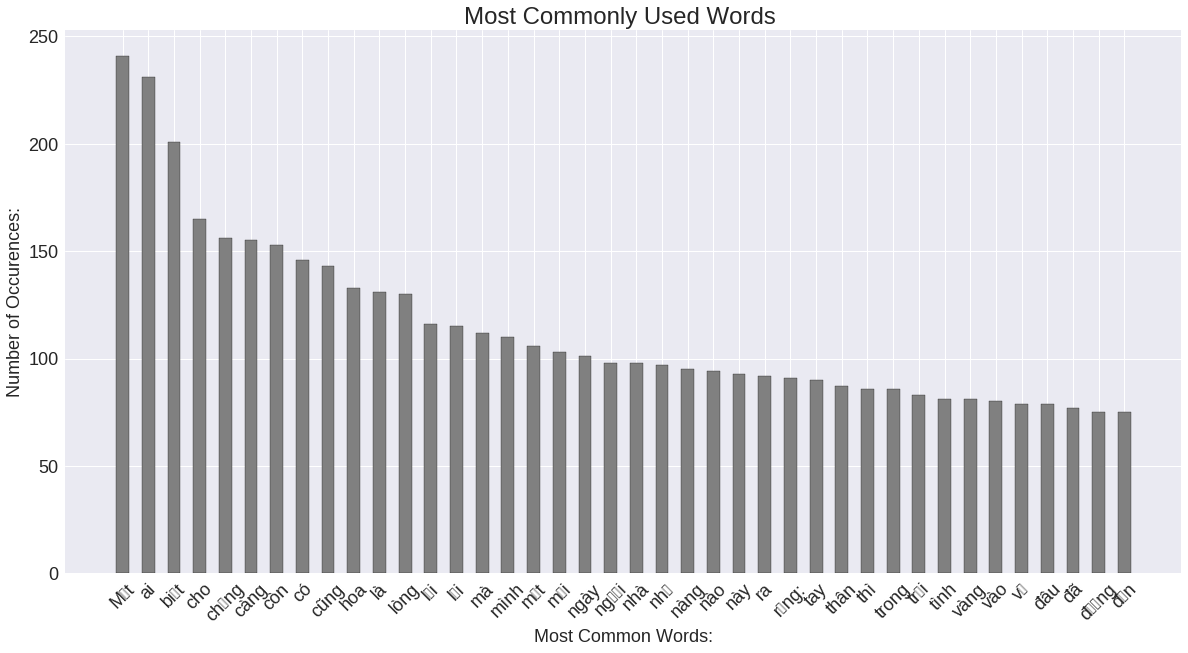

In [0]:

with open("Truyen_Kieu_no_punctuation_newline.txt") as f:
    text = f.read()
plotWordFrequency(text)

## LSTM char

We use a LSTM network to generate new character.

Some observations:
- (after 50 epochs) Many times it generates 6-8-word rule sentences. It is really interesting!
- small diversity/temperature (i.e. pick argmax) will give more coherent words
- rhyme?
- why?

In [7]:
#https://github.com/keras-team/keras/blob/master/examples/lstm_text_generation.py
from __future__ import print_function
import keras
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys

text = text_no_newline
#we want text is in the form
# 'Today is Monday. Tomorrow is Tuesday. The day after tomorrow is Wednesday....'

# not of the form 
# 'Today is Monday.\n Tomorrow is Tuesday\n.....'
# That is, there is no '\n'

print('The number of character in the originial text:', len(text))

chars = sorted(list(set(text))) 
print('The number of different characters in the original text:', len(chars)) 
char_indices = dict((c, i) for i, c in enumerate(chars))

indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40 # this is the number of consecutive characters put in the input (each tranining )
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences/trainings:', len(sentences)) 


print('One hot encoding...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


# build the model: a single LSTM
print('Build model...')
model = Sequential()


model.add(LSTM(128, input_shape=(maxlen, len(chars))))
#so input_dim = len(chars), input_length = maxlen
#the output of this layer is a vector of dim 128. This is the last vector
#output of the LSTM. All other vectors, (maxlen-1) of them, are discarded.

# 'last vector output' because return_sequences = False by default in LSTM
# 

model.add(Dense(len(chars), activation='softmax'))
# add another Dense layer with softmax activation
# output is a vector of length len(chars)
# sum of its element is one.

optimizer = RMSprop(lr=0.01)
#optimizer: a strategy to do gradient descend/ finding minimum of loss
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
#we can write 
#model.compile(loss='categorical_crossentropy', optimizer = 'RMSprop')
#but then it won't give the option to choose learning rate of RMSprop. 
#the default lr of RMSprop is lr=0.001

#However we can write
#model.compile(loss='categorical_crossentropy', optimizer = RMSprop(lr=0.01))
#we use categorical_crossentropy since this is a categorical/classification problem
# guessing the next character

def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    #So preds = softmax(log(original preds)/temperature)
    # that means
    # preds = (original preds)^(1/temperature) / (sum)
    # really funny
    
    
    # if temperature is small, then it's very cold, everything is frozen
    # hence if old_preds[i] is big, then preds[i] is very close to 1
    # we can predict what will appear
    # if temperature is extremely small, 
    # then the return is almost argmax(old_preds)
    # which is what we dream of.
    
    # if temperature is big, then it's hot, everything is chaos
    # we can not predict what will appear
    # all preds[i]'s tend to be the same,
    # that is, preds converges to discrete uniform measure
    # hence the probability to choose each character is 1/total diff_character
    
    probas = np.random.multinomial(1, preds, 1)
    # first argument 1-> n, last argument->k
    #An experiment is throwing a dice n times (i.e once in this case). 
    #This dice has len(preds) values. 
    #each value has probability preds[value]
    #Do the experement k times
    #The output of each experiment is a vector of len(preds)
    # the output of multinomial is a vector of m x len(preds)
    # the sum of all element of this vector is n
    
    return np.argmax(probas)
    #return index with highest values

def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    # it is a method/property of keras.callback
    # An example. We can set up to do something after every 5 epochs,
    # instead of every epoch
    
    
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    #start_index = random.randint(0, len(text) - maxlen - 1)
    start_index=0 # choose a fixed seed sentence, or we can randomize start_index
    for diversity in [0.01, 0.2, 1.0]:
        print('----- diversity:', diversity)

        generated = ''
        #choose a sentence in sentences
        # we can randomize start_index
        # sentence = text[start_index: start_index + maxlen]
        # or you can choose your own sentence with maxlen characters
        sentence = 'Trăm năm trong cõi người ta chữ tài chữ '
        #sentence = 'I do not understand that you are saying '
        #sentence = 'Trăm tiền trong cõi nbl ti ta, tình kông'
        
        
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        #print is just a wrapper of sys.stdout.write
        sys.stdout.write(generated)
        
                
        #produce 400  new characters
        for i in range(400):
            #one hot encoding of sentence
            x_pred = np.zeros((1, maxlen, len(chars)))
            
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.
            
            #then put x_pred into model.predict
            preds = model.predict(x_pred, verbose=0)[0]
            
            # presumably sum(preds) = 1
            next_index = sample(preds, diversity)
            #a new index is chosen. Transform it to a corresonding character
            
            next_char = indices_char[next_index]

            generated += next_char # this code is currently redundant
            
            
            #update sentence to predict the next character
            # we remove the first character and append the new character
            sentence = sentence[1:] + next_char
            
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print() #new line

print_callback = LambdaCallback(on_epoch_end = on_epoch_end)
# https://keras.io/callbacks/#lambdacallback
checkpoint_path = "training_1/kerascp.ckpt"
!mkdir training_1
#keras will give error if the folder doesn't exist
#tf.keras doesn't give error

# Create checkpoint callback
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)



model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback, cp_callback])

The number of character in the originial text: 102525
The number of different characters in the original text: 125
Number of sequences/trainings: 34162
One hot encoding...
Build model...
mkdir: cannot create directory ‘training_1’: File exists
Epoch 1/60
34162/34162 [==============================] - 29s 837us/step - loss: 2.4739

----- Generating text after Epoch: 0
----- diversity: 0.01
----- Generating with seed: "Trăm năm trong cõi người ta chữ tài chữ "
Trăm năm trong cõi người ta chữ tài chữ chuyên trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước người trước ngư
----- diversity: 0.2
----- Generating with seed: "Trăm năm trong cõi người ta chữ tài chữ "
Trăm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log


ước thì thì thì thì thì cũng thì chia đến nghi. Chàng chi chi một nhà Nghe người thường Thưa rằng: Trước chưa phải việc thì chia nha. Trời rằng: Trước có nghi một ngày Thấy trường thanh thế người người Thiếp than
----- diversity: 1.0
----- Generating with seed: "Trăm năm trong cõi người ta chữ tài chữ "
Trăm năm trong cõi người ta chữ tài chữ thần lai Thân điều là chữ phầm Đượng mắt giất dưang Phật là nghe gen. Hạ tốc phong nàng một hồi. Trên thầy vui lỡ muôn. Nàng rằng: vào Tải vừa Tiểu tai tính nhén phùng âm ngày nàng có như Buyên bấy giờ Bán mà nhừng nhà Đưa riuông oạn đã kậy thì ấy biết đấy gần nhận canh. Rằng: Đắp đượng bóng ghiện ráp gáng vào Trời hàn sao người sao. Nghe tuốc người thai n rào điều Tấy này một thải Thường màng thế

Epoch 00007: saving model to training_1/kerascp.ckpt
Epoch 8/60
34162/34162 [==============================] - 28s 811us/step - loss: 1.4597

----- Generating text after Epoch: 7
----- diversity: 0.01
----- Generating with seed: "Trăm năm trong cõi ngườ

In [0]:
model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback, cp_callback])

Epoch 1/60
34162/34162 [==============================] - 23s 687us/step - loss: 0.4236

----- Generating text after Epoch: 0
----- diversity: 0.01
----- Generating with seed: "Trăm năm trong cõi người ta chữ tình chữ"
Trăm năm trong cõi người ta chữ tình chữ từ th

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log


a. Vùng nghe với thế thôi nàng làm chờ. Đã sang là đã mấy phương nào phảng kiều. Bâuyên lên thế thì thôi Đa hay khi muốn bạc điều về đây. Cọi chàng đã biết theo cho bin. Rằng: Tôi biến sẵm bóng từ nào mưa ra. Nàng rằng: Trời nghe bọn hoa Du là trước sân cầu bết cầu ngần. Bâuyên gió chự sương là May sanh tự gió lời nào mình. Thưa hoa thừa cần xanh la đời nồng. Những là đắt như cuồng chi mình.
----- diversity: 0.2
----- Generating with seed: "Trăm năm trong cõi người ta chữ tình chữ"
Trăm năm trong cõi người ta chữ tình chữ từ thấy hoa. Cùng nhau nước mụ ấm khi đồng một lầu. Vì tra một đủ ngoài cầu cam đầm. Tiểu thư được tháng năn mây Trăm năm tưới thế này Cho vào trong như chút nàng Đem điều nửa biết giãu hương là Một nhà cho trò khuất thanh hàn Chăng rằng: Hay những vốn câu với nàng. Túc nàng với thế tường Mà chăn cầy mà rụng rời Nhìn hồng là chi khọn người này kha. Đã hùng là chạ cùng dần bồng chung. Nghe tình mọ
----- diversity: 1.0
----- Generating with seed: "Trăm năm trong cõi ngư

KeyboardInterrupt: ignored